# Execute WPS processes with PYTHON 

#### First, we need to import <font color='red'>*owslib*</font> client for PyWPS.   
#### Hummingbird is working on port <font color='green'>*8092*</font>

In [1]:
import os
import pwd

from owslib.wps import WebProcessingService, monitorExecution, ComplexDataInput, printInputOutput
wps = WebProcessingService(url="http://localhost:8092/wps", verbose=False, skip_caps=False)
#wps = WebProcessingService(url="http://wps-test.ipsl.jussieu.fr:8092/wps", verbose=False, skip_caps=False)

#### Check, the name of the WPS Service

In [2]:
wps.identification.title

'Hummingbird 0.5_dev'

#### Get the list of the processess provided by service

In [3]:
for process in wps.processes:
    print '%s \t : %s \n'% (process.identifier, process.abstract)

ncdump 	 : Run ncdump to retrieve NetCDF header metadata. 

spotchecker 	 : Checks a single uploaded or remote dataset against a variety of compliance standards. The dataset is either in the NetCDF format or a remote OpenDAP resource. Available compliance standards are the Climate and Forecast conventions (CF) and project specific rules for CMIP6 and CORDEX. 

cchecker 	 : Runs the IOOS Compliance Checker tool to check datasets against compliance standards. Each compliance standard is executed by a Check Suite, which functions similar to a Python standard Unit Test. A Check Suite runs one or more checks against a dataset, returning a list of Results which are then aggregated into a summary. Development and maintenance for the compliance checker is done by the Integrated Ocean Observing System (IOOS). 

cfchecker 	 : The NetCDF Climate Forcast Conventions compliance checker by CEDA. This process allows you to run the compliance checker to check that the contents of a NetCDF file comply 

#### Get the parameters of the <font color='green'>*ncdump*</font> process:

In [4]:
process = wps.describeprocess(identifier='ncdump')
print process.title

for input in process.dataInputs:
    printInputOutput(input)
    print '\n'

NCDump
 identifier=dataset, title=Dataset, abstract=Enter a URL pointing to a NetCDF file (optional), data type=ComplexData
 Supported Value: mimeType=application/x-netcdf, encoding=None, schema=None
 Default Value: mimeType=application/x-netcdf, encoding=None, schema=None 
 minOccurs=0, maxOccurs=100


 identifier=dataset_opendap, title=Remote OpenDAP Data URL, abstract=Or provide a remote OpenDAP data URL, for example: http://my.opendap/thredds/dodsC/path/to/file.nc, data type=string
 Any value allowed
 Default Value: None 
 minOccurs=0, maxOccurs=100




#### Define the input parameters for the process.   
#### We will use external netcdf file from the web, and the file:

In [5]:
home = pwd.getpwuid(os.getuid()).pw_dir

res_loc = home + "/birdhouse/blackswan/blackswan/tests/testdata/ncep/slp.mon.mean.2005.nc"

#pywps works with urls, http, https or file://
res_loc_for_ds = "file://" + res_loc
res_remote = "https://www.esrl.noaa.gov/psd/thredds/fileServer/Datasets/ncep.reanalysis.derived/surface/air.mon.ltm.nc"

resource = [res_loc_for_ds, res_remote]
print resource

dataset1 = ComplexDataInput(resource[0])
dataset2 = ComplexDataInput(resource[1])

['file:///homel/nkadyg/birdhouse/blackswan/blackswan/tests/testdata/ncep/slp.mon.mean.2005.nc', 'https://www.esrl.noaa.gov/psd/thredds/fileServer/Datasets/ncep.reanalysis.derived/surface/air.mon.ltm.nc']


In [6]:
inputs = [
    ('dataset',dataset1),
    ('dataset',dataset2),
    ]

#### Now execute the process and get the published output

In [7]:
execute = wps.execute(
    identifier="ncdump",
    inputs=inputs
    )

# check process if completed ...
monitorExecution(execute, sleepSecs=5)

print 'Check the results!'
for o in execute.processOutputs:
    print o.reference

Check the results!
http://localhost:8090/wpsoutputs/hummingbird/aea89834-2c52-11e8-86e1-d89ef3118394/nc_dump.txt


#### Now let's check regriding process.
##### Check it's arguments:

In [8]:
process = wps.describeprocess(identifier='cdo_inter_mpi')
print process.title

for input in process.dataInputs:
    printInputOutput(input)
    print '\n'

CDO Remapping
 identifier=netcdf_file, title=NetCDF File, abstract=You may provide a URL or upload a NetCDF file., data type=ComplexData
 Supported Value: mimeType=application/x-netcdf, encoding=None, schema=None
 Default Value: mimeType=application/x-netcdf, encoding=None, schema=None 
 minOccurs=1, maxOccurs=100


 identifier=operator, title=CDO Operator, abstract=Choose a CDO Operator, data type=string
 Allowed Value: remapbil
 Allowed Value: remapbic
 Allowed Value: remapdis
 Allowed Value: remapnn
 Allowed Value: remapcon
 Allowed Value: remapcon2
 Allowed Value: remaplaf
 Default Value: remapbil 
 minOccurs=0, maxOccurs=1


 identifier=regr, title=Grid, abstract=Select an grid, data type=string
 Allowed Value: r64x32
 Allowed Value: r32x16
 Allowed Value: r1024x512
 Allowed Value: r360x180
 Allowed Value: r480x241
 Allowed Value: custom
 Default Value: r360x180 
 minOccurs=0, maxOccurs=1


 identifier=longitude, title=longitude, abstract=New nx Longitude, data type=string
 Any va

#### The mandatory input is <font color='green'>*netcdf_file*</font> , we also change default grid - <font color='green'>*regr*</font> - (for testing preformance)    
So wedefine inputs as follows (dataset has CompexData type)

In [9]:
inputs = [
    ('netcdf_file',dataset1),
    ('netcdf_file',dataset2),
    ('regr', 'r32x16'),
    ]

#### And execute the process

In [10]:
execute = wps.execute(
    identifier="cdo_inter_mpi",
    inputs=inputs
    )

# check process if completed ...
monitorExecution(execute, sleepSecs=5)

# Lets remember the coarse file for future:
coarse_file = execute.processOutputs[0].reference

print 'You may click and download tar archive with all the results'
print 'Or download one file and view it with ncview'
for o in execute.processOutputs:
    print o.reference

You may click and download tar archive with all the results
Or download one file and view it with ncview
http://localhost:8090/wpsoutputs/hummingbird/b364e4cc-2c52-11e8-86e1-d89ef3118394/tmp6BA_ZQ.nc
http://localhost:8090/wpsoutputs/hummingbird/b364e4cc-2c52-11e8-86e1-d89ef3118394/tmpaLzZnp.tar


#### Now let's test <font color='green'>*cdo_bbox*</font> process, one for subsetting the data 

In [11]:
process = wps.describeprocess(identifier='cdo_bbox')
print process.title
for input in process.dataInputs:
    printInputOutput(input)
    print '\n'

CDO select lon/lat box
 identifier=dataset, title=Dataset, abstract=You may provide a URL or upload a NetCDF file., data type=ComplexData
 Supported Value: mimeType=application/x-netcdf, encoding=None, schema=None
 Default Value: mimeType=application/x-netcdf, encoding=None, schema=None 
 minOccurs=0, maxOccurs=100


 identifier=dataset_opendap, title=Remote OpenDAP Data URL, abstract=Or provide a remote OpenDAP data URL, for example: http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis2.dailyavgs/surface/mslp.2016.nc, data type=string
 Any value allowed
 Default Value: None 
 minOccurs=0, maxOccurs=100


 identifier=bbox, title=Bounding Box, abstract=Enter a bbox: min_lon, max_lon, min_lat, max_lat. min_lon=Western longitude, max_lon=Eastern longitude, min_lat=Southern or northern latitude, max_lat=Northern or southern latitude. For example: 0,20,40,60, data type=string
 Any value allowed
 Default Value: 0,20,40,60  
 minOccurs=1, maxOccurs=1




#### Note, that the identifier for the process is now <font color='green'>*dataset*</font>

In [12]:
inputs = [
    ('dataset',dataset1),
    ('dataset',dataset2),
    ]

In [13]:
execute = wps.execute(
    identifier="cdo_bbox",
    inputs=inputs
    )
# check process if completed ...
monitorExecution(execute, sleepSecs=5)

for o in execute.processOutputs:
    print o.reference

http://localhost:8090/wpsoutputs/hummingbird/b7d36826-2c52-11e8-86e1-d89ef3118394/air.mon.ltm_bbox.nc
http://localhost:8090/wpsoutputs/hummingbird/b7d36826-2c52-11e8-86e1-d89ef3118394/cdo_bbox.tar


##### Let's use output of one process as input for another.   
##### We will regrid (small) netcdf file and select domain from it

In [14]:
inputs = [
    ('netcdf_file',dataset2),
    ('regr', 'r360x180'),
    ]

In [15]:
execute = wps.execute(
    identifier="cdo_inter_mpi",
    inputs=inputs
    )
# check process if completed ...
monitorExecution(execute, sleepSecs=5)

regr_outfile = execute.processOutputs[0].reference

for o in execute.processOutputs:
    print o.reference

http://localhost:8090/wpsoutputs/hummingbird/bbed7a00-2c52-11e8-86e1-d89ef3118394/tmpDc15yt.nc
http://localhost:8090/wpsoutputs/hummingbird/bbed7a00-2c52-11e8-86e1-d89ef3118394/tmpP6qMMN.tar


In [16]:
# We take regrided file and prepare dataset to be used as input for cdo_bbox process
print regr_outfile
regr_dataset = ComplexDataInput(regr_outfile) #, mimeType='appliction/x-netcdf')

http://localhost:8090/wpsoutputs/hummingbird/bbed7a00-2c52-11e8-86e1-d89ef3118394/tmpDc15yt.nc


In [17]:
inputs = [
    ('dataset',regr_dataset),
    ('bbox','-20,80,30,70'), # define required lonmin, lonmax, latmin and latmax bbox
    ]

In [18]:
execute = wps.execute(
    identifier="cdo_bbox",
    inputs=inputs
    )
# check process if completed ...
monitorExecution(execute, sleepSecs=5)

bbox_outfile = execute.processOutputs[0].reference

for o in execute.processOutputs:
    print o.reference

http://localhost:8090/wpsoutputs/hummingbird/c025aeee-2c52-11e8-86e1-d89ef3118394/tmpDc15yt_bbox.nc
http://localhost:8090/wpsoutputs/hummingbird/c025aeee-2c52-11e8-86e1-d89ef3118394/cdo_bbox.tar


#### If working from BlackSwan or FlyingPigeon envs, we can use matplot and cartopy to plot the figures

In [19]:
%matplotlib inline

from matplotlib import pyplot as plt
from matplotlib.cm import get_cmap

import cartopy.crs as ccrs
import numpy as np
from netCDF4 import Dataset

In [20]:
# Dataset module of netCDF4 lib works with direct local paths, not file:/// or http, so we transform it to our local path
# it works only on local instance of birdhouse, but we just want to plot output.
# later we will create WPS process for that

to_repl = home + '/birdhouse/var/lib/pywps/outputs'

fn_regr = regr_outfile.replace('http://localhost:8090/wpsoutputs',to_repl)
fn_bbox = bbox_outfile.replace('http://localhost:8090/wpsoutputs',to_repl)

print 'Local files, regrided and subsetted: \n'
print fn_regr
print fn_bbox

Local files, regrided and subsetted: 

/homel/nkadyg/birdhouse/var/lib/pywps/outputs/hummingbird/bbed7a00-2c52-11e8-86e1-d89ef3118394/tmpDc15yt.nc
/homel/nkadyg/birdhouse/var/lib/pywps/outputs/hummingbird/c025aeee-2c52-11e8-86e1-d89ef3118394/tmpDc15yt_bbox.nc


In [21]:
# Load the data, lat and lon arrays
regr_data = Dataset(fn_regr)
regr_val = regr_data.variables['air'][0,:,:]
lat_regr = regr_data.variables['lat'][:]
lon_regr = regr_data.variables['lon'][:]

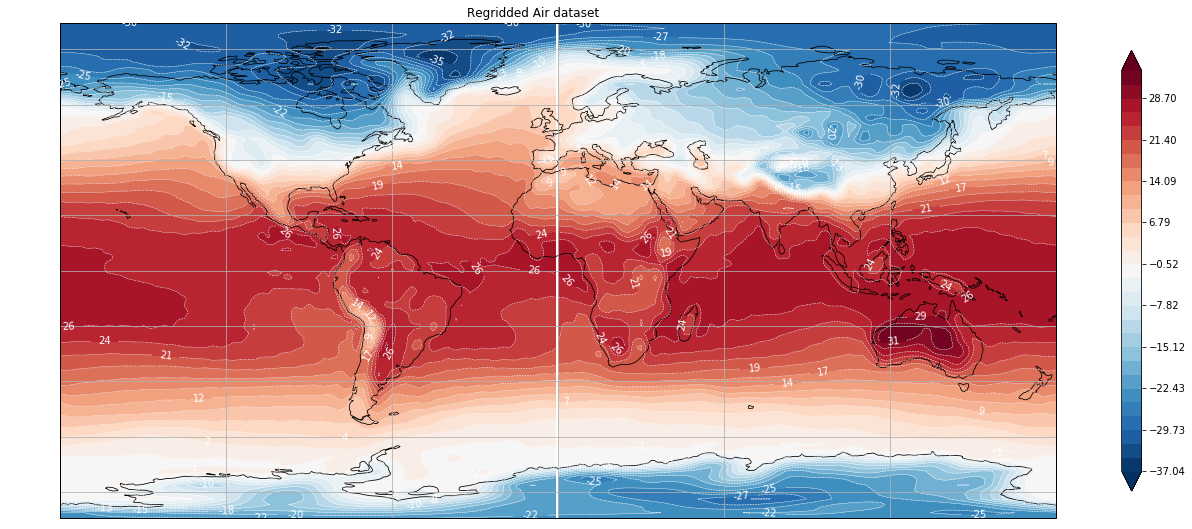

In [22]:
# Create a figure
fig = plt.figure()
fig.set_size_inches(18.5, 10.5, forward=True)

# Add costlines and set the projection
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.8)
ax.gridlines()

vmin = np.min(regr_val)
vmax = np.max(regr_val)

# Define the levels to plot
levels = np.linspace(vmin, vmax, 30)

# Select colorscale
cmap=get_cmap("RdBu_r")

# And plot it to the figure
data_map = ax.contourf(lon_regr, lat_regr, regr_val, levels=levels, extend='both', cmap=cmap, projection=ccrs.PlateCarree())
data_cbar = plt.colorbar(data_map, extend='both', shrink=0.6)
data_cont = ax.contour(lon_regr, lat_regr, regr_val, levels=levels, linewidths=0.5, colors="white", linestyles = 'dashed', projection=ccrs.PlateCarree())

plt.clabel(data_cont, inline=1, fmt='%1.0f')
title = 'Regridded Air dataset'
plt.title(title)
plt.tight_layout()

##### Do the same for subsetted domain

In [23]:
bbox_data = Dataset(fn_bbox)
# Here we know that the variable is 'air'. In general case it will be detected
bbox_val = bbox_data.variables['air'][0,:,:]
lat_bbox = bbox_data.variables['lat'][:]
lon_bbox = bbox_data.variables['lon'][:]

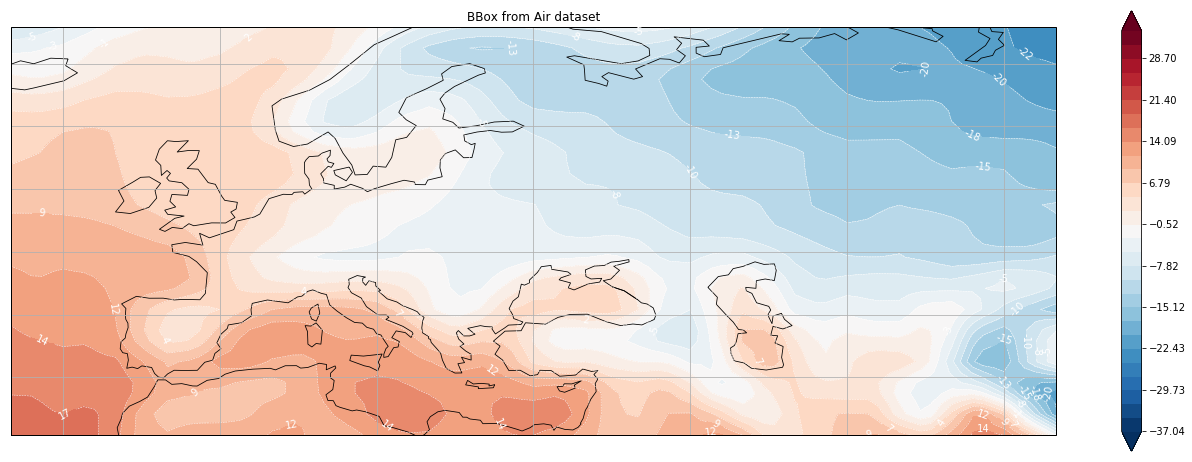

In [24]:
fig = plt.figure()
fig.set_size_inches(18.5, 10.5, forward=True)

ax = plt.axes(projection=ccrs.PlateCarree())
#ax.set_extent(domain, crs=ccrs.PlateCarree())
ax.coastlines(linewidth=0.8)
ax.gridlines()

#vmin = np.min(bbox_val)
#vmax = np.max(bbox_val)

levels = np.linspace(vmin, vmax, 30)

cmap=get_cmap("RdBu_r")

data_map = ax.contourf(lon_bbox, lat_bbox, bbox_val, levels=levels, extend='both', cmap=cmap, projection=ccrs.PlateCarree())
data_cbar = plt.colorbar(data_map, extend='both', shrink=0.6)
data_cont = ax.contour(lon_bbox, lat_bbox, bbox_val, levels=levels, linewidths=0.5, colors="white", linestyles = 'dashed', projection=ccrs.PlateCarree())

plt.clabel(data_cont, inline=1, fmt='%1.0f')
title = 'BBox from Air dataset'
plt.title(title)
plt.tight_layout()

##### Let's create plotter function from the code above.   
We already create file <font color='red'>*my_plot.py*</font> and put the following code there   
(check the <font color='red'>*~/birdhouse/blackswan/blackswan/my_plot.py*</font> ):

```python
from matplotlib import use
use('Agg')
# no X11 server ... must be run first

from matplotlib import pyplot as plt
from matplotlib.cm import get_cmap

import cartopy.crs as ccrs
import numpy as np
from netCDF4 import Dataset
import pwd
import os
import uuid

def simple_plot(resource, variable='air', lat='lat', lon ='lon', timestep=0, output=None):
    """
    Generates a nice and simple plot.
    """
    print("Plotting {}, timestep {} ...".format(resource, timestep))

    pl_data = Dataset(resource)

    pl_val = pl_data.variables[variable][timestep,:,:]
    pl_lat = pl_data.variables[lat][:]
    pl_lon = pl_data.variables[lon][:]

    fig = plt.figure()
    fig.set_size_inches(18.5, 10.5, forward=True)

    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines(linewidth=0.8)
    ax.gridlines()

    vmin = np.min(pl_val)
    vmax = np.max(pl_val)

    levels = np.linspace(vmin, vmax, 30)

    cmap=get_cmap("RdBu_r")

    data_map = ax.contourf(pl_lon, pl_lat, pl_val, levels=levels, extend='both', cmap=cmap,
                           projection=ccrs.PlateCarree())
    
    data_cbar = plt.colorbar(data_map, extend='both', shrink=0.6)
    
    data_cont = ax.contour(pl_lon, pl_lat, pl_val, levels=levels, linewidths=0.5, colors="white",
                           linestyles = 'dashed', projection=ccrs.PlateCarree())

    plt.clabel(data_cont, inline=1, fmt='%1.0f')
    title = 'Simple plot for %s' % (variable)
    plt.title(title)
    plt.tight_layout()

    if not output:
        output = 'myplot_%s.png' % (uuid.uuid1())

    plt.savefig(output)
    fig.clf()
    plt.close(fig)

    print("Plot written to {}".format(output))
    return output

```

##### This function takes input file <font color='green'>*resource*</font> as an argument, and has another options with default values (may be changed during the call)

## <span style="background-color:blue"> <font color='white'> Now, lets create our first WPS process for simple plotting </font> </span>

*You can find the detailed description here:* http://pywps.readthedocs.io/en/master/process.html   
##### <font color='green'>And follow the comments in the code block bellow </font>

#### All PyPWS processes located at ~/birdhouse/<font color='red'>*servicename/servicename*</font>/processes/    folder   
#### For BlackSwan this is: <font color='red'>*~/birdhouse/blackswan/blackswan/processes/*</font> 
#### All the processes are initiated by ``` ~/birdhouse/blackswan/blackswan/processes/__init__.py```  script when the services started

## So, to add a simple WPS with one mandatory input, we create file:   
### <font color='red'> ~/birdhouse/blackswan/blackswan/processes/wps_simple_plot.py </font>

#### Let's see what is inside, (Read the comments inline!) all the wps process have the similar structure, you can check them in the same folder

```python
from pywps import Process, LiteralInput, ComplexInput, ComplexOutput
from pywps import Format

# Here we load our simple_plot function we just create
from blackswan.my_plot import simple_plot

# This is additional module to detect the input variable, if not set
from blackswan.utils import get_variable

# Module to log the process
# The level of loging is set in custom.cfg file for every service. Could be WARN, INFO, DEBUG...
import logging
LOGGER = logging.getLogger('PYWPS')

# Just default input dataset, normally is optional
AIR_DS = 'https://www.esrl.noaa.gov/psd/thredds/fileServer/Datasets/ncep.reanalysis.derived/surface/air.mon.ltm.nc'

# The Class name for the process. It has parent class 'Process' we import from pywps. See the first line.
# This class is initialised by ~/birdhouse/blackswan/blackswan/processes/__init__.py
class SimplePlot(Process):
    def __init__(self):
        # Now we define our inputs, check wit how we did it when we called the cdo_bbox proc for instance.
        inputs = [
            ComplexInput('dataset', 'Dataset', supported_formats=[Format('application/x-netcdf')],
                         default=AIR_DS,
                         abstract='Example: {0}'.format(AIR_DS)),
            LiteralInput('variable', 'Variable',
                         data_type='string',
                         default=None,
                         min_occurs=0,
                         max_occurs=1,
                         abstract='Enter the variable name (variable will be detected if not set)'),
        ]
        # and the outputs, in our case just one png plot.
        outputs = [
            ComplexOutput('output', 'Simple Plot', supported_formats=[Format('image/png')],
                          as_reference=True),
        ]
        # Here we initialize the parent class, you don't need to go deep into it to write your wps proc.
        super(SimplePlot, self).__init__(
            self._handler,
            identifier='simple_plot',
            title='Simple Plot',
            abstract='Returns a nice and simple plot.',
            version='1.0',
            inputs=inputs,
            outputs=outputs,
            store_supported=True,
            status_supported=True
        )

    def _handler(self, request, response):
        # Handler method - this method obtains request object and response
        # object and creates the buffer. Here we perform all analysis with provided inputs
        # and produce our results as output
        
        if 'variable' in request.inputs:
            variable = request.inputs['variable'][0].data
        else:
            variable = get_variable(request.inputs['dataset'][0].file)
            if type(variable) is tuple: variable = variable[0]

        # If we don't use detection of the variable
        # variable = request.inputs['variable'][0].data

        # Call simple_plot function from our my_plot.py module we have load
        # as arguments we send name of the file, from the identifier 'dataset' 
        # of the request, and the variable namem whether from the request, 
        # or from detection
        output = simple_plot(
            resource=request.inputs['dataset'][0].file,
            variable=variable)
        LOGGER.info("produced output: %s", output)
        #Publish output, and that's it!
        response.outputs['output'].file = output
        response.update_status("simple_plot done", 100)
        return response
```

### When we create ```~/birdhouse/blackswan/blackswan/processes/wps_simple_plot.py``` as above      
### add it's import to the ```~/birdhouse/blackswan/blackswan/processes/__init__.py``` 
### the line ```from .wps_simple_plot import SimplePlot```   
### and add the class initialization ```processes = [ ..., SimplePlot(), ...]```   

### the final version of ```__init__.py```: 
```python
from .wps_weatherregimes_reanalyse import WeatherregimesreanalyseProcess
from .wps_weatherregimes_model import WeatherregimesmodelProcess
from .wps_analogs_reanalyse import AnalogsreanalyseProcess
from .wps_analogs_model import AnalogsmodelProcess
from .wps_analogs_compare import AnalogscompareProcess
from .wps_analogs_viewer import AnalogsviewerProcess
from .wps_analogs_cta import AnalogsreanalyseCTA
from .wps_simple_plot import SimplePlot
from .wps_pythonanattribution import PythonanattributionProcess
processes = [
    WeatherregimesreanalyseProcess(),
    WeatherregimesmodelProcess(),
    AnalogsreanalyseProcess(),
    AnalogsmodelProcess(),
    AnalogscompareProcess(),
    AnalogsviewerProcess(),
    AnalogsreanalyseCTA(),
    SimplePlot(),
    PythonanattributionProcess(),
]
```


### Thats all! Now the process is in birdhouse. All the processes listed above were created the same way.   

After you just do ```make restart``` and the process will appear in the processes list of the service   

### <font color='green'>So, if you have your Python script for your scientific calculations, or Fortran program or R-code, or... You may creater your own PyWPS process for that. You just need to make 'wrapper' for your arguments, prepare inputs define there the output is, and that's it!</font>

### <font color='red'>(!)</font><font color='green'> Also you can try to run your process with the</font> <font color='blue'>*birdy*</font> <font color='green'>tool (in terminal):</font>
```
$ export WPS_SERVICE=http://localhost:8096/wps
$ birdy simple_plot --dataset https://www.esrl.noaa.gov/psd/thredds/fileServer/Datasets/ncep.reanalysis.dailyavgs/surface/slp.1969.nc
[ProcessAccepted 0/100] PyWPS Process simple_plot accepted
[ProcessSucceeded 0/100] PyWPS Process Simple Plot finished
Output:
output=http://localhost:8090/wpsoutputs/blackswan/...verylongaddress...png (image/png)
```

### So then the process is added, you can see it in the list of available procs:   
#### BlackSwan (where we add our process) is working on port <font color='green'>*8096*</font>

In [25]:
wps = WebProcessingService(url="http://localhost:8096/wps", verbose=False, skip_caps=False)
for process in wps.processes:
    print '%s \t : %s \n'% (process.identifier, process.abstract)

weatherregimes_reanalyse 	 : k-mean cluster analyse of the pressure patterns. Clusters are equivalent to weather regimes 

weatherregimes_model 	 : k-mean cluster analyse of the pressure patterns. Clusters are equivalent to weather regimes 

analogs_reanalyse 	 : Search for days with analogue pressure pattern for reanalyses data sets 

analogs_model 	 : Search for days with analogue pressure pattern for models data sets 

analogs_compare 	 : Search for days with analogue pressure pattern for reanalyses data sets 

analogs_viewer 	 : Visualisation of text output of analogue process 

analogs_cta 	 : Search for days with analogue pressure pattern for reanalyses data sets 

simple_plot 	 : Returns a nice and simple plot. 

pythonanattribution 	 : Attributioms with analogues 



In [26]:
process = wps.describeprocess(identifier='simple_plot')
print process.title

for input in process.dataInputs:
    printInputOutput(input)
    print '\n'

Simple Plot
 identifier=dataset, title=Dataset, abstract=Example: https://www.esrl.noaa.gov/psd/thredds/fileServer/Datasets/ncep.reanalysis.derived/surface/air.mon.ltm.nc, data type=ComplexData
 Supported Value: mimeType=application/x-netcdf, encoding=None, schema=None
 Default Value: mimeType=application/x-netcdf, encoding=None, schema=None 
 minOccurs=1, maxOccurs=1


 identifier=variable, title=Variable, abstract=Enter the variable name (variable will be detected if not set), data type=string
 Any value allowed
 Default Value: None 
 minOccurs=0, maxOccurs=1




In [27]:
# Reminder of curent files: 
print 'regr_outfile:'
print regr_outfile, '\n' # Regrided to 360x180 file
print 'bbox_outfile:'
print bbox_outfile, '\n' # Selection of the domain from regrided file
print 'resource[0]:'
print resource[0], '\n' # SLP local file
print 'res_loc:'
print res_loc, '\n' # local file in /home/... format
print 'resource[1]:'
print resource[1], '\n' # Initial air file

regr_outfile:
http://localhost:8090/wpsoutputs/hummingbird/bbed7a00-2c52-11e8-86e1-d89ef3118394/tmpDc15yt.nc 

bbox_outfile:
http://localhost:8090/wpsoutputs/hummingbird/c025aeee-2c52-11e8-86e1-d89ef3118394/tmpDc15yt_bbox.nc 

resource[0]:
file:///homel/nkadyg/birdhouse/blackswan/blackswan/tests/testdata/ncep/slp.mon.mean.2005.nc 

res_loc:
/homel/nkadyg/birdhouse/blackswan/blackswan/tests/testdata/ncep/slp.mon.mean.2005.nc 

resource[1]:
https://www.esrl.noaa.gov/psd/thredds/fileServer/Datasets/ncep.reanalysis.derived/surface/air.mon.ltm.nc 



In [28]:
# Plot the regrided file
inputs = [('dataset',ComplexDataInput(regr_outfile))]
#variable : air

execute = wps.execute(identifier="simple_plot", inputs=inputs)

monitorExecution(execute, sleepSecs=1)
for o in execute.processOutputs:
    print o.reference

http://localhost:8090/wpsoutputs/blackswan/2426f15a-2c53-11e8-86e1-d89ef3118394/myplot_257a126c-2c53-11e8-86e1-d89ef3118394.png


In [29]:
# Now we will use coarse_file from the begining of the exercise
inputs = [('dataset',ComplexDataInput(coarse_file))]
#variable : air

execute = wps.execute(identifier="simple_plot", inputs=inputs)

monitorExecution(execute, sleepSecs=1)
for o in execute.processOutputs:
    print o.reference

http://localhost:8090/wpsoutputs/blackswan/26b24a96-2c53-11e8-86e1-d89ef3118394/myplot_26b24a97-2c53-11e8-86e1-d89ef3118394.png


In [30]:
# Plot the bbox file
inputs = [('dataset',ComplexDataInput(bbox_outfile))]
#variable : air

execute = wps.execute(identifier="simple_plot", inputs=inputs)

monitorExecution(execute, sleepSecs=1)
for o in execute.processOutputs:
    print o.reference

http://localhost:8090/wpsoutputs/blackswan/284c2606-2c53-11e8-86e1-d89ef3118394/myplot_284c2607-2c53-11e8-86e1-d89ef3118394.png


In [31]:
# Or just plot the file with URL: https://www.esrl.noaa.gov/..../air.mon.ltm.nc 

inputs = [('dataset',ComplexDataInput(resource[1]))]
# variable: slp'

execute = wps.execute(identifier="simple_plot", inputs=inputs)

monitorExecution(execute, sleepSecs=1)
for o in execute.processOutputs:
    print o.reference

http://localhost:8090/wpsoutputs/blackswan/29c8bfc6-2c53-11e8-86e1-d89ef3118394/myplot_2b8a4c44-2c53-11e8-86e1-d89ef3118394.png


### -----------------------------------------------------------------------------------------------------------------------------------------------------------
#### You might notice that there is a white vertical line on a plots: the latitudes are wraped in original file
### in birdhouse PyWPS processes we extensively use the OpenClimateGIS (OCGIS) module:    
*Package designed for geospatial manipulation, subsetting, computation, and translation of spatiotemporal datasets stored in local NetCDF files or files served through THREDDS data servers.*   
https://www.earthsystemcog.org/projects/openclimategis/   
https://ocgis.readthedocs.io/en/latest/   
With OCGIS you may work with a set of files as one, select domain or time interval etc.   
The module responsible for that is <font color='red'>~/birdhouse/blackswan/blackswan/ocgis_module.py</font>   
As well as <font color='red'>*~/birdhouse/flyingpigeon/flyingpigeon/ocgis_module.py*</font>

You can find the ocgis call in many birdhouse WPS processes, which work with a set of input netcdf files and temporal/spatial selection

In [32]:
import sys
sys.path.append(home + '/birdhouse/blackswan')

from blackswan.ocgis_module import call

/homel/nkadyg/.conda/envs/blackswan/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/homel/nkadyg/.conda/envs/blackswan/lib/python2.7/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


#### in Jupyter notebook you get the descriprion of the module, its functions and objects with <font color='red'>'?'</font> command
#### Run the cell bellow, check the information and close the help window


In [33]:
call?

In [34]:
# We will show how to call ocgis and use our simple_plot wps to plot the results
# so, 

# The same files with different reference 
print 'resource[0]:'
print resource[0], '\n' # SLP local file
print 'res_loc:'
print res_loc, '\n' # local file in /home/... format


resource[0]:
file:///homel/nkadyg/birdhouse/blackswan/blackswan/tests/testdata/ncep/slp.mon.mean.2005.nc 

res_loc:
/homel/nkadyg/birdhouse/blackswan/blackswan/tests/testdata/ncep/slp.mon.mean.2005.nc 



In [35]:
# Plot the file, we use file:// ref here:

inputs = [('dataset',ComplexDataInput(resource[0]))]
# variable: slp'

execute = wps.execute(identifier="simple_plot", inputs=inputs)

monitorExecution(execute, sleepSecs=1)
for o in execute.processOutputs:
    print o.reference
print 'Check result!'

http://localhost:8090/wpsoutputs/blackswan/3f9f9004-2c53-11e8-86e1-d89ef3118394/myplot_407fb288-2c53-11e8-86e1-d89ef3118394.png
Check result!


In [37]:
### Call OCGIS with wrapping spatial wrapping (ocgis works without file://):
good_lat=call(resource=res_loc, spatial_wrapping='wrap')
print good_lat

/homel/nkadyg/birdhouse/blackswan/WS/5913beb6-2c53-11e8-86e1-d89ef3118394.nc


In [38]:
# Maked complex data from the result, usinf file:// ref.
ds = ComplexDataInput('file://' + good_lat)

inputs = [('dataset',ds)]
execute = wps.execute(identifier="simple_plot", inputs=inputs)

monitorExecution(execute, sleepSecs=1)
for o in execute.processOutputs:
    print o.reference
print 'Compare result!'

http://localhost:8090/wpsoutputs/blackswan/5cd7eef0-2c53-11e8-86e1-d89ef3118394/myplot_5cd7eef1-2c53-11e8-86e1-d89ef3118394.png
Compare result!


#### BBOX selection with OCGIS is also really easy, only diference is geometry: it's [lonmin, latmin, lonmax, latmax]

In [39]:
# Make a ocgis call with subsetting
good_lat=call(resource=res_loc, spatial_wrapping='wrap', geom = [-20,30,80,70])
print good_lat

/homel/nkadyg/birdhouse/blackswan/WS/63294f7e-2c53-11e8-86e1-d89ef3118394.nc


In [40]:
# Maked complex data from the result, using file:// ref.
ds = ComplexDataInput('file://' + good_lat)

# And plot it with wps
inputs = [('dataset',ds)]
execute = wps.execute(identifier="simple_plot", inputs=inputs)

monitorExecution(execute, sleepSecs=1)
for o in execute.processOutputs:
    print o.reference
print 'Check the result!'

http://localhost:8090/wpsoutputs/blackswan/642d7a12-2c53-11e8-86e1-d89ef3118394/myplot_642d7a13-2c53-11e8-86e1-d89ef3118394.png
Check the result!
